In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
mpl.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#f0f4f7'
plt.rc('legend', frameon=True,fancybox=True, framealpha=1)
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

blue = '#4C72B0'
green = '#55A868'
red = '#C44E52'
purple = '#8172B2'
yellow = '#CCB974'
lightblue = '#64B5CD'

import importlib
import os
from os import path
import sys
import platform
import qgrid
import qgrid

from sync_postprocessing import *

%load_ext autoreload
%autoreload 2


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# windows
#openephys_dir = r"C:\maxland_RECORDING\openephys\2021-02-19_15-54-34\Record Node 101\experiment1\recording1"

# mac
openephys_dir = "/Users/max/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/2 VR Setup/Software/PyBpod Environments/maxland_test_setup/openephys/2021-02-19_15-54-34/Record Node 101/experiment1/recording1"

pybpod_session = "20210219-155417"

# windows
#pybpod_root = r"C:\maxland_RECORDING"

# mac
pybpod_root = "/Users/max/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/2 VR Setup/Software/PyBpod Environments/maxland_test_setup"

In [302]:
combined_df = get_sync(openephys_dir,pybpod_root,pybpod_session)
qgrid.show_grid(combined_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<IPython.core.display.Javascript object>


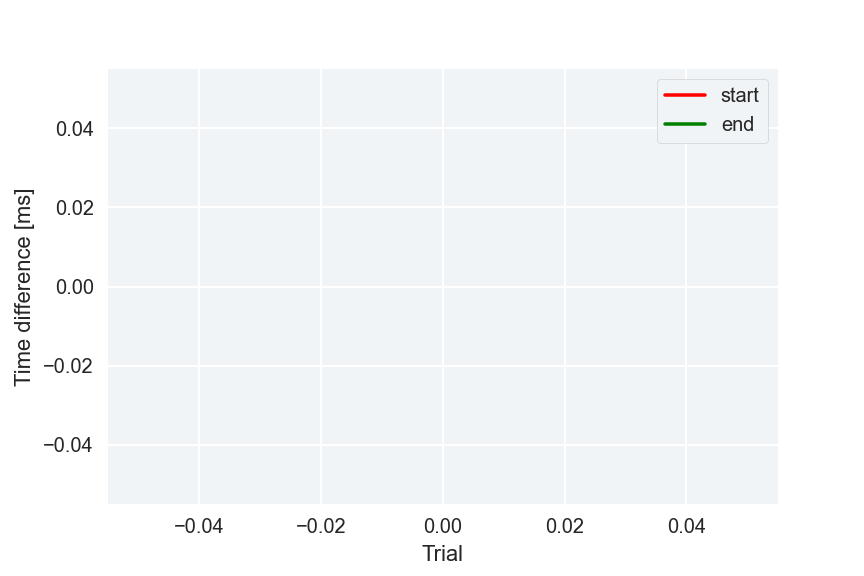

In [303]:
fig,ax = plt_start_stop_dif(combined_df)

<IPython.core.display.Javascript object>


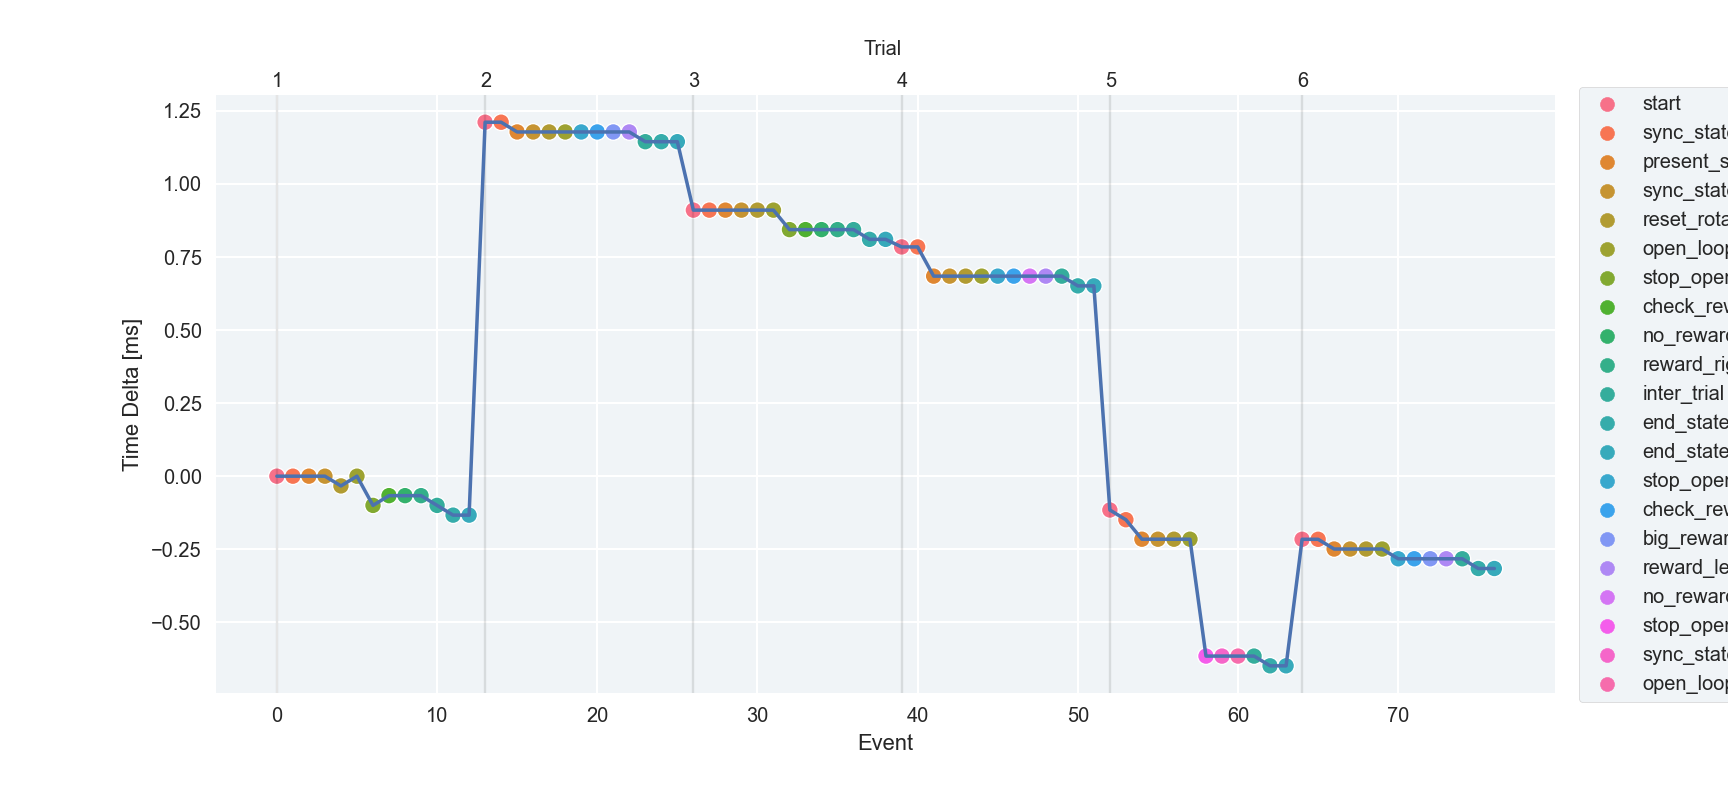

In [380]:
fig,ax = plt_event_dif(combined_df,all=False)

In [ ]:
for block in blocks:
            occurance=(np.where(self.all_trials_df['probability']==block)[0][0])
            ax.axvline(occurance,0,1,linestyle='-',color='k',linewidth=0.5,alpha=0.4)
            ax.text(occurance-15, 10.6, f"{block*100}%")

<IPython.core.display.Javascript object>


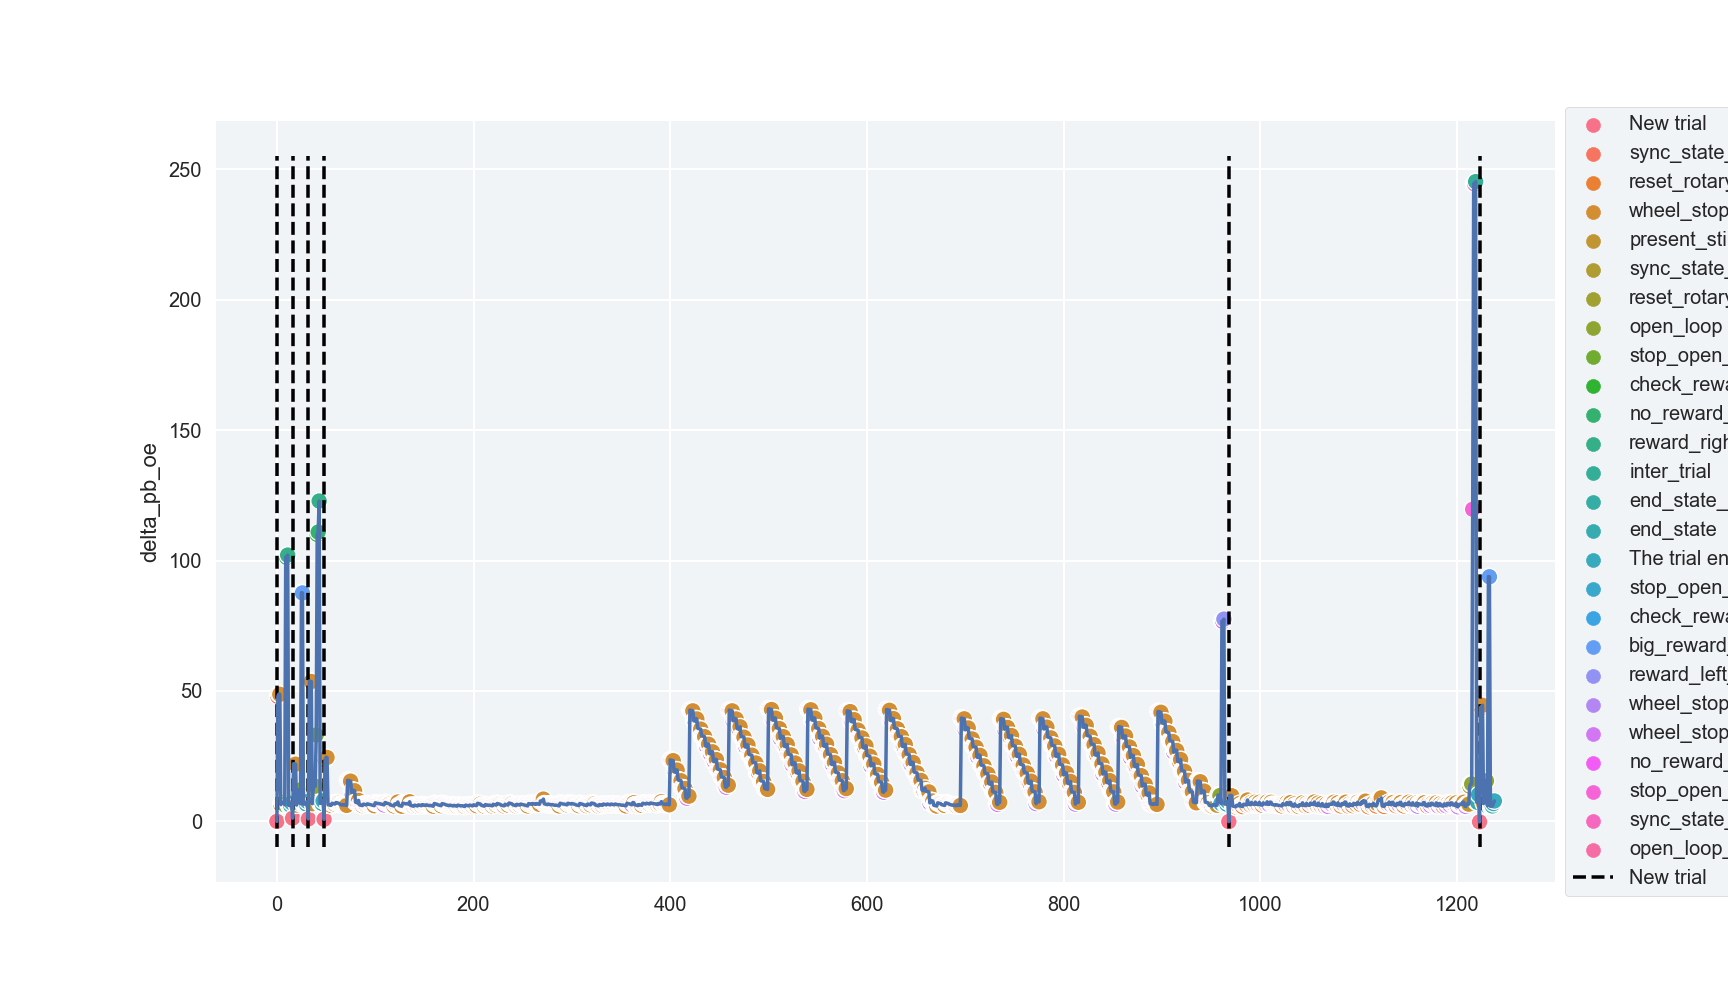

In [120]:
import seaborn as sns

data = combined_df
data.delta_pb_oe = data.delta_pb_oe.astype(float)

new_trial_index = data.loc[data.pb_event=='New trial']


fig,ax = plt.subplots(figsize=(12,7))
g = sns.scatterplot(data=data, x=data.index, y='delta_pb_oe', hue='pb_event', s=70)
sns.lineplot(data=data.delta_pb_oe)
plt.vlines(new_trial_index.index.values, -10,data.delta_pb_oe.max()+10,linestyle='--',color='k',label='New trial')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>


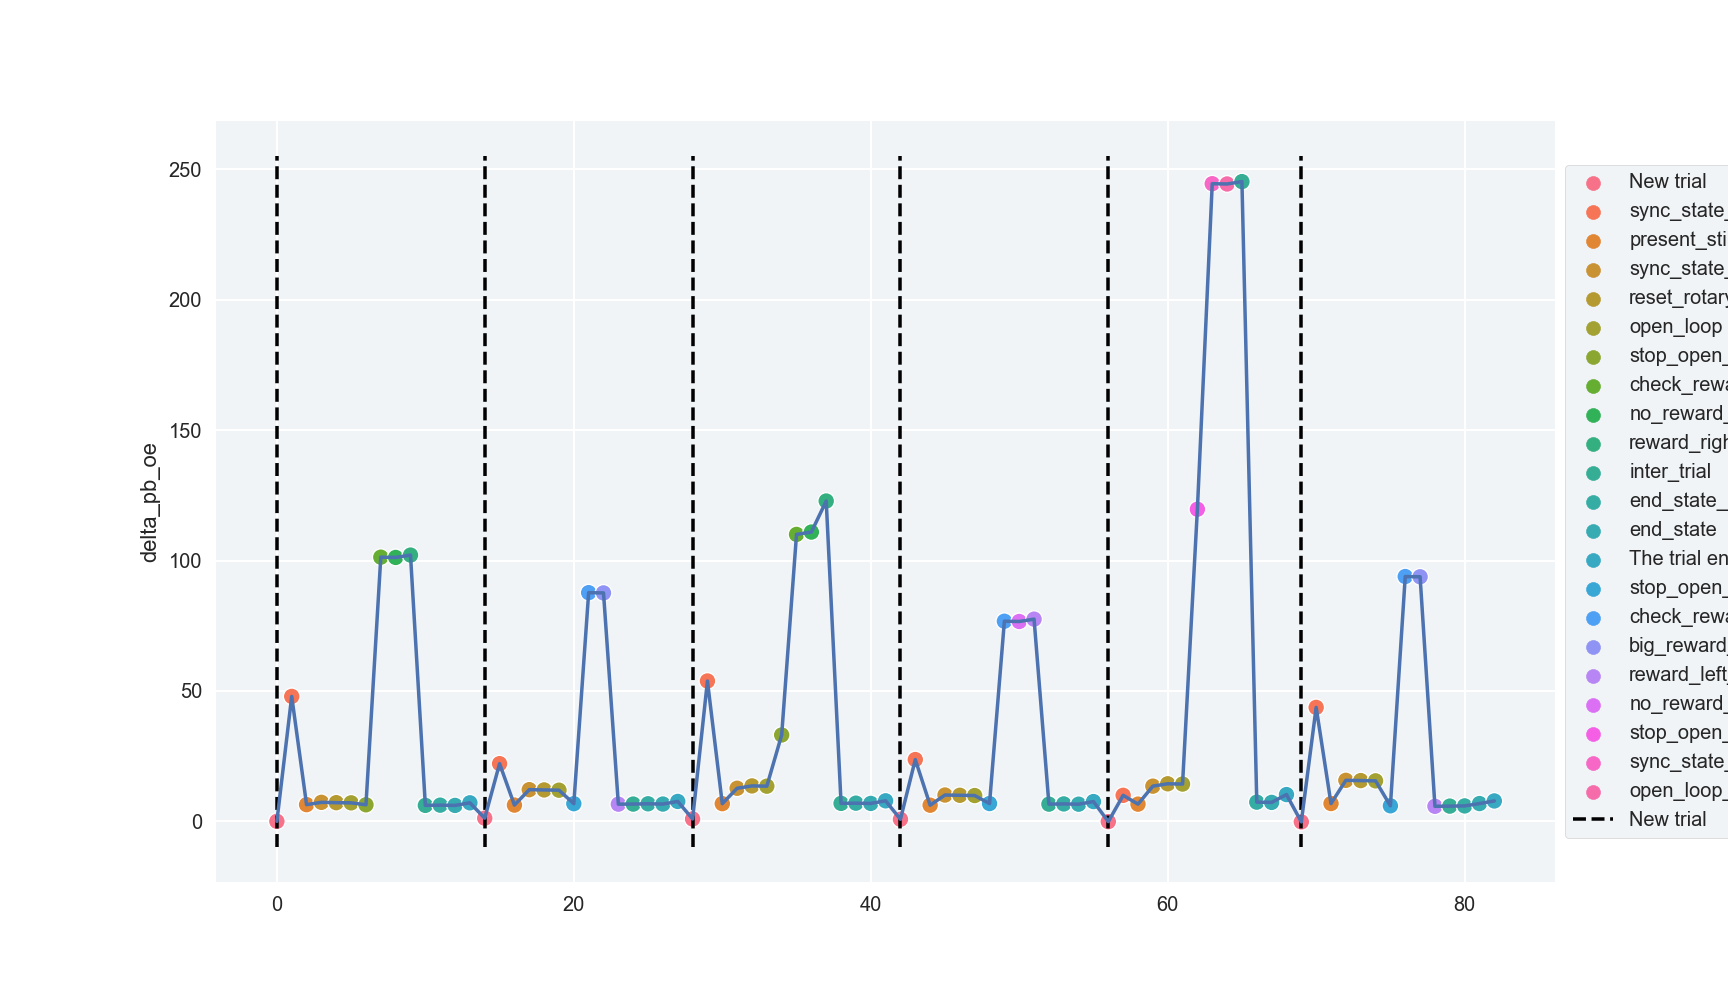

In [119]:
not_list = ['wheel_stopping_check','wheel_stopping_check_failed_punish','wheel_stopping_check_failed_reset','reset_rotary_encoder_wheel_stopping_check']
bool_filter = ~combined_df.pb_event.isin(not_list)
data = combined_df.loc[bool_filter].copy()
data.reset_index(inplace=True,drop=True)
data.delta_pb_oe = data.delta_pb_oe.astype(float)

new_trial_index = data.loc[data.pb_event=='New trial']


fig,ax = plt.subplots(figsize=(12,7))
# scatterplot with color
g = sns.scatterplot(data=data, x=data.index, y='delta_pb_oe', hue='pb_event', s=70)
# connect dots
sns.lineplot(data=data.delta_pb_oe)
# add trial start lines
plt.vlines(new_trial_index.index.values, -10,data.delta_pb_oe.max()+10,linestyle='--',color='k',label='New trial')
# move index outside
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Binary Format

## Load OpenEphys Events

In [12]:
oe_events_df = load_oo_events(openephys_dir)
qgrid.show_grid(oe_events_df)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Plot

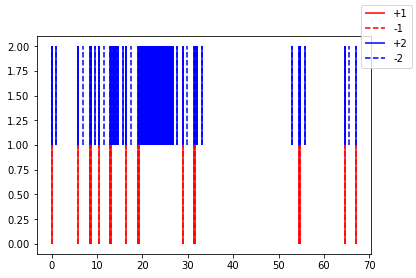

In [20]:
fig,ax = plt.subplots()
ax.vlines(oe_events_df.loc[oe_events_df.event==1,"s_relativ"], 0,1, label='+1', color ='r')
ax.vlines(oe_events_df.loc[oe_events_df.event==-1,"s_relativ"], 0,1, label='-1', color ='r',linestyle='--')

ax.vlines(oe_events_df.loc[oe_events_df.event==2,"s_relativ"], 1,2, label='+2', color ='b')
ax.vlines(oe_events_df.loc[oe_events_df.event==-2,"s_relativ"], 1,2, label='-2', color ='b',linestyle='--')

#ax.vlines(ch2, 0,1, label='2', color='grey', alpha=0.5)
#ax.vlines(ch5, 0,1, label='5',color='grey', alpha=0.5)
fig.legend()

## Load PyBpod Events

In [10]:
pb_events_df = load_bp_events(pybpod_root,pybpod_session)

selector = np.logical_or(pb_events_df.TYPE=="TRANSITION",pb_events_df.TYPE=="TRIAL")
pb_sync_df = pb_events_df.loc[selector,["MSG","ms_relativ","BPOD-INITIAL-TIME"]]
pb_sync_df.reset_index(drop=True,inplace=True)

qgrid.show_grid(pb_events_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
oe_trials_df = extract_events_oo(oe_events_df)
qgrid.show_grid(oe_trials_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [19]:
qgrid.show_grid(pb_events_df.loc[14:51,['TYPE','MSG','ms_relativ']])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [20]:
qgrid.show_grid(oe_trials_df.loc[:15])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [22]:
qgrid.show_grid(combined_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [269]:
states_df = pb_events_df.loc[pb_events_df.TYPE=='STATE']
states_df = states_df.dropna(axis=0,how='any')

starts = pb_events_df.loc[pb_events_df.loc[(pb_events_df.TYPE=='TRIAL')].index,'ms_relativ'].copy()
starts.reset_index(inplace=True,drop=True)

start_idx = -1
trial=False
for idx in states_df.index:
    if states_df.loc[idx,'BPOD-INITIAL-TIME']==0:
        start_idx+=1
    states_df.loc[idx,'ms_relativ']=states_df.loc[idx,'BPOD-INITIAL-TIME']*1000+starts.loc[start_idx]

oe_trials_df=oe_trials_df.loc[np.invert(oe_trials_df.event_type=='end')]
pb_sync_df = states_df.loc[:,["MSG","ms_relativ","BPOD-INITIAL-TIME"]]
# combine both
combined_ar = np.zeros([pb_sync_df.shape[0],4],dtype=object)
combined_ar[:oe_trials_df.shape[0],[0,2]]=oe_trials_df.values
combined_ar[:pb_sync_df.shape[0],[1,3]]=pb_sync_df.loc[:,["ms_relativ","MSG"]].values
combined_df=pd.DataFrame(combined_ar,columns=["oe_ms_relativ","pb_ms_relativ","oe_event","pb_event"])
combined_df["delta_pb_oe"]=combined_df["pb_ms_relativ"]-combined_df["oe_ms_relativ"]


not_list = ['wheel_stopping_check','wheel_stopping_check_failed_punish','wheel_stopping_check_failed_reset','reset_rotary_encoder_wheel_stopping_check']
bool_filter = ~combined_df.pb_event.isin(not_list)
data = combined_df.loc[bool_filter].copy()
data.reset_index(inplace=True,drop=True)
data.delta_pb_oe = data.delta_pb_oe.astype(float)

new_trial_index = data.loc[data.pb_event=='New trial']


fig,ax = plt.subplots(figsize=(12,7))
# scatterplot with color
g = sns.scatterplot(data=data, x=data.index, y='delta_pb_oe', hue='pb_event', s=70)
# connect dots
sns.lineplot(data=data.delta_pb_oe)
# add trial start lines
plt.vlines(new_trial_index.index.values, -10,data.delta_pb_oe.max()+10,linestyle='--',color='k',label='New trial')
# move index outside
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>

In [229]:
trials_df = pb_events_df.loc[pb_events_df.TYPE=='STATE']
trials_df = states_df.dropna(axis=0,how='any')

pb_sync_df = pb_events.loc[:,["MSG","ms_relativ","BPOD-INITIAL-TIME"]]
# combine both
combined_ar = np.zeros([pb_sync_df.shape[0],4],dtype=object)
combined_ar[:oe_trials_df.shape[0],[0,2]]=oe_trials_df.values
combined_ar[:pb_sync_df.shape[0],[1,3]]=pb_sync_df.loc[:,["ms_relativ","MSG"]].values
combined_df=pd.DataFrame(combined_ar,columns=["oe_ms_relativ","pb_ms_relativ","oe_event","pb_event"])
combined_df["delta_pb_oe"]=combined_df["pb_ms_relativ"]-combined_df["oe_ms_relativ"]


(1239, 2)

In [272]:
data = pb_events_df.copy()

events = data.loc[data.TYPE=='TRANSITION']
start = data.iloc[data.loc[(data.TYPE=='TRIAL')].index.values+2,:]
end = data.iloc[data.loc[(data.TYPE=='END-TRIAL')].index.values-1,:]

pb_events = pd.concat([events,start,end],axis=0,join="outer",ignore_index=False)
pb_events.sort_index(inplace=True)
pb_events.ms_relativ = pb_events.ms_relativ-pb_events.iloc[1]['ms_relativ']

pb_sync_df = pb_events.loc[:,["MSG","ms_relativ","BPOD-INITIAL-TIME"]]
# combine both
combined_ar = np.zeros([pb_sync_df.shape[0],4],dtype=object)
combined_ar[:oe_trials_df.shape[0],[0,2]]=oe_trials_df.values
combined_ar[:pb_sync_df.shape[0],[1,3]]=pb_sync_df.loc[:,["ms_relativ","MSG"]].values
combined_df=pd.DataFrame(combined_ar,columns=["oe_ms_relativ","pb_ms_relativ","oe_event","pb_event"])
combined_df["delta_pb_oe"]=combined_df["pb_ms_relativ"]-combined_df["oe_ms_relativ"]

not_list = ['wheel_stopping_check','wheel_stopping_check_failed_punish','wheel_stopping_check_failed_reset','reset_rotary_encoder_wheel_stopping_check']
bool_filter = ~combined_df.pb_event.isin(not_list)
data = combined_df.loc[bool_filter].copy()
data.reset_index(inplace=True,drop=True)
data.delta_pb_oe = data.delta_pb_oe.astype(float)

new_trial_index = data.loc[data.pb_event=='New trial']


fig,ax = plt.subplots(figsize=(12,7))
# scatterplot with color
g = sns.scatterplot(data=data, x=data.index, y='delta_pb_oe', hue='pb_event', s=70)
# connect dots
sns.lineplot(data=data.delta_pb_oe)
# add trial start lines
plt.vlines(new_trial_index.index.values, -10,data.delta_pb_oe.max()+10,linestyle='--',color='k',label='New trial')
# move index outside
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>

In [ ]:
user_settings = pybpod_root

In [204]:
root_dir = pybpod_root
session = pybpod_session

if platform.system() == 'Linux':
    event_folder = (root_dir + "/experiments/gamble_task/setups/gamble_task_recording/sessions")
elif platform.system() == 'Windows':
    folder = (root_dir + r"\experiments\gamble_task\setups\gamble_task_recording\sessions")
elif platform.system() == 'Darwin': #macos
    folder= (root_dir + "/experiments/gamble_task/setups/gamble_task_recording/sessions")

file = path.join(folder,session,f"{session}_usersettings.json")

In [207]:
import json
with open(file) as f:
    data = json.load(f)

In [209]:
data['time_dict']

{'time_start': 0.0,
 'time_wheel_stopping_check': 1.0,
 'time_wheel_stopping_punish': 0.0,
 'time_stim_pres': 0.0,
 'time_open_loop': 20.0,
 'time_open_loop_fail_punish': 0.0,
 'time_stim_freez': 0.0,
 'time_reward': 1.0,
 'time_inter_trial': 1.5,
 'time_big_reward_waiting': 0.9,
 'time_small_reward_waiting': 0.962,
 'open_time_big_reward': 0.1,
 'open_time_small_reward': 0.038}

In [218]:
times_df = pd.DataFrame.from_dict(data['time_dict'],orient ='index') #list(dict_test.items()), columns = [‘food’,’animal’]
times_df

,0
time_start,0.000
time_wheel_stopping_check,1.000
time_wheel_stopping_punish,0.000
time_stim_pres,0.000
time_open_loop,20.000
time_open_loop_fail_punish,0.000
time_stim_freez,0.000
time_reward,1.000
time_inter_trial,1.500
time_big_reward_waiting,0.900


# Workbench

In [286]:
oe_events_df = load_oo_events(openephys_dir)
oe_trials_df = extract_events_oo(oe_events_df)

oe_end_idx = oe_trials_df.loc[oe_trials_df.event_type=='end'].index

#oe_trials_df=oe_trials_df.loc[np.invert(oe_trials_df.event_type=='end')]


In [294]:
not_select = oe_trials_df.index.isin(oe_end_idx.values-1)

In [296]:
qgrid.show_grid(oe_trials_df.loc[~not_select])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [338]:
data = combined_df.copy()
data.delta_pb_oe = data.delta_pb_oe.astype(float)

new_trial = data.loc[data.pb_event=='start']

trials = np.arange(1,new_trial.shape[0])

<IPython.core.display.Javascript object>


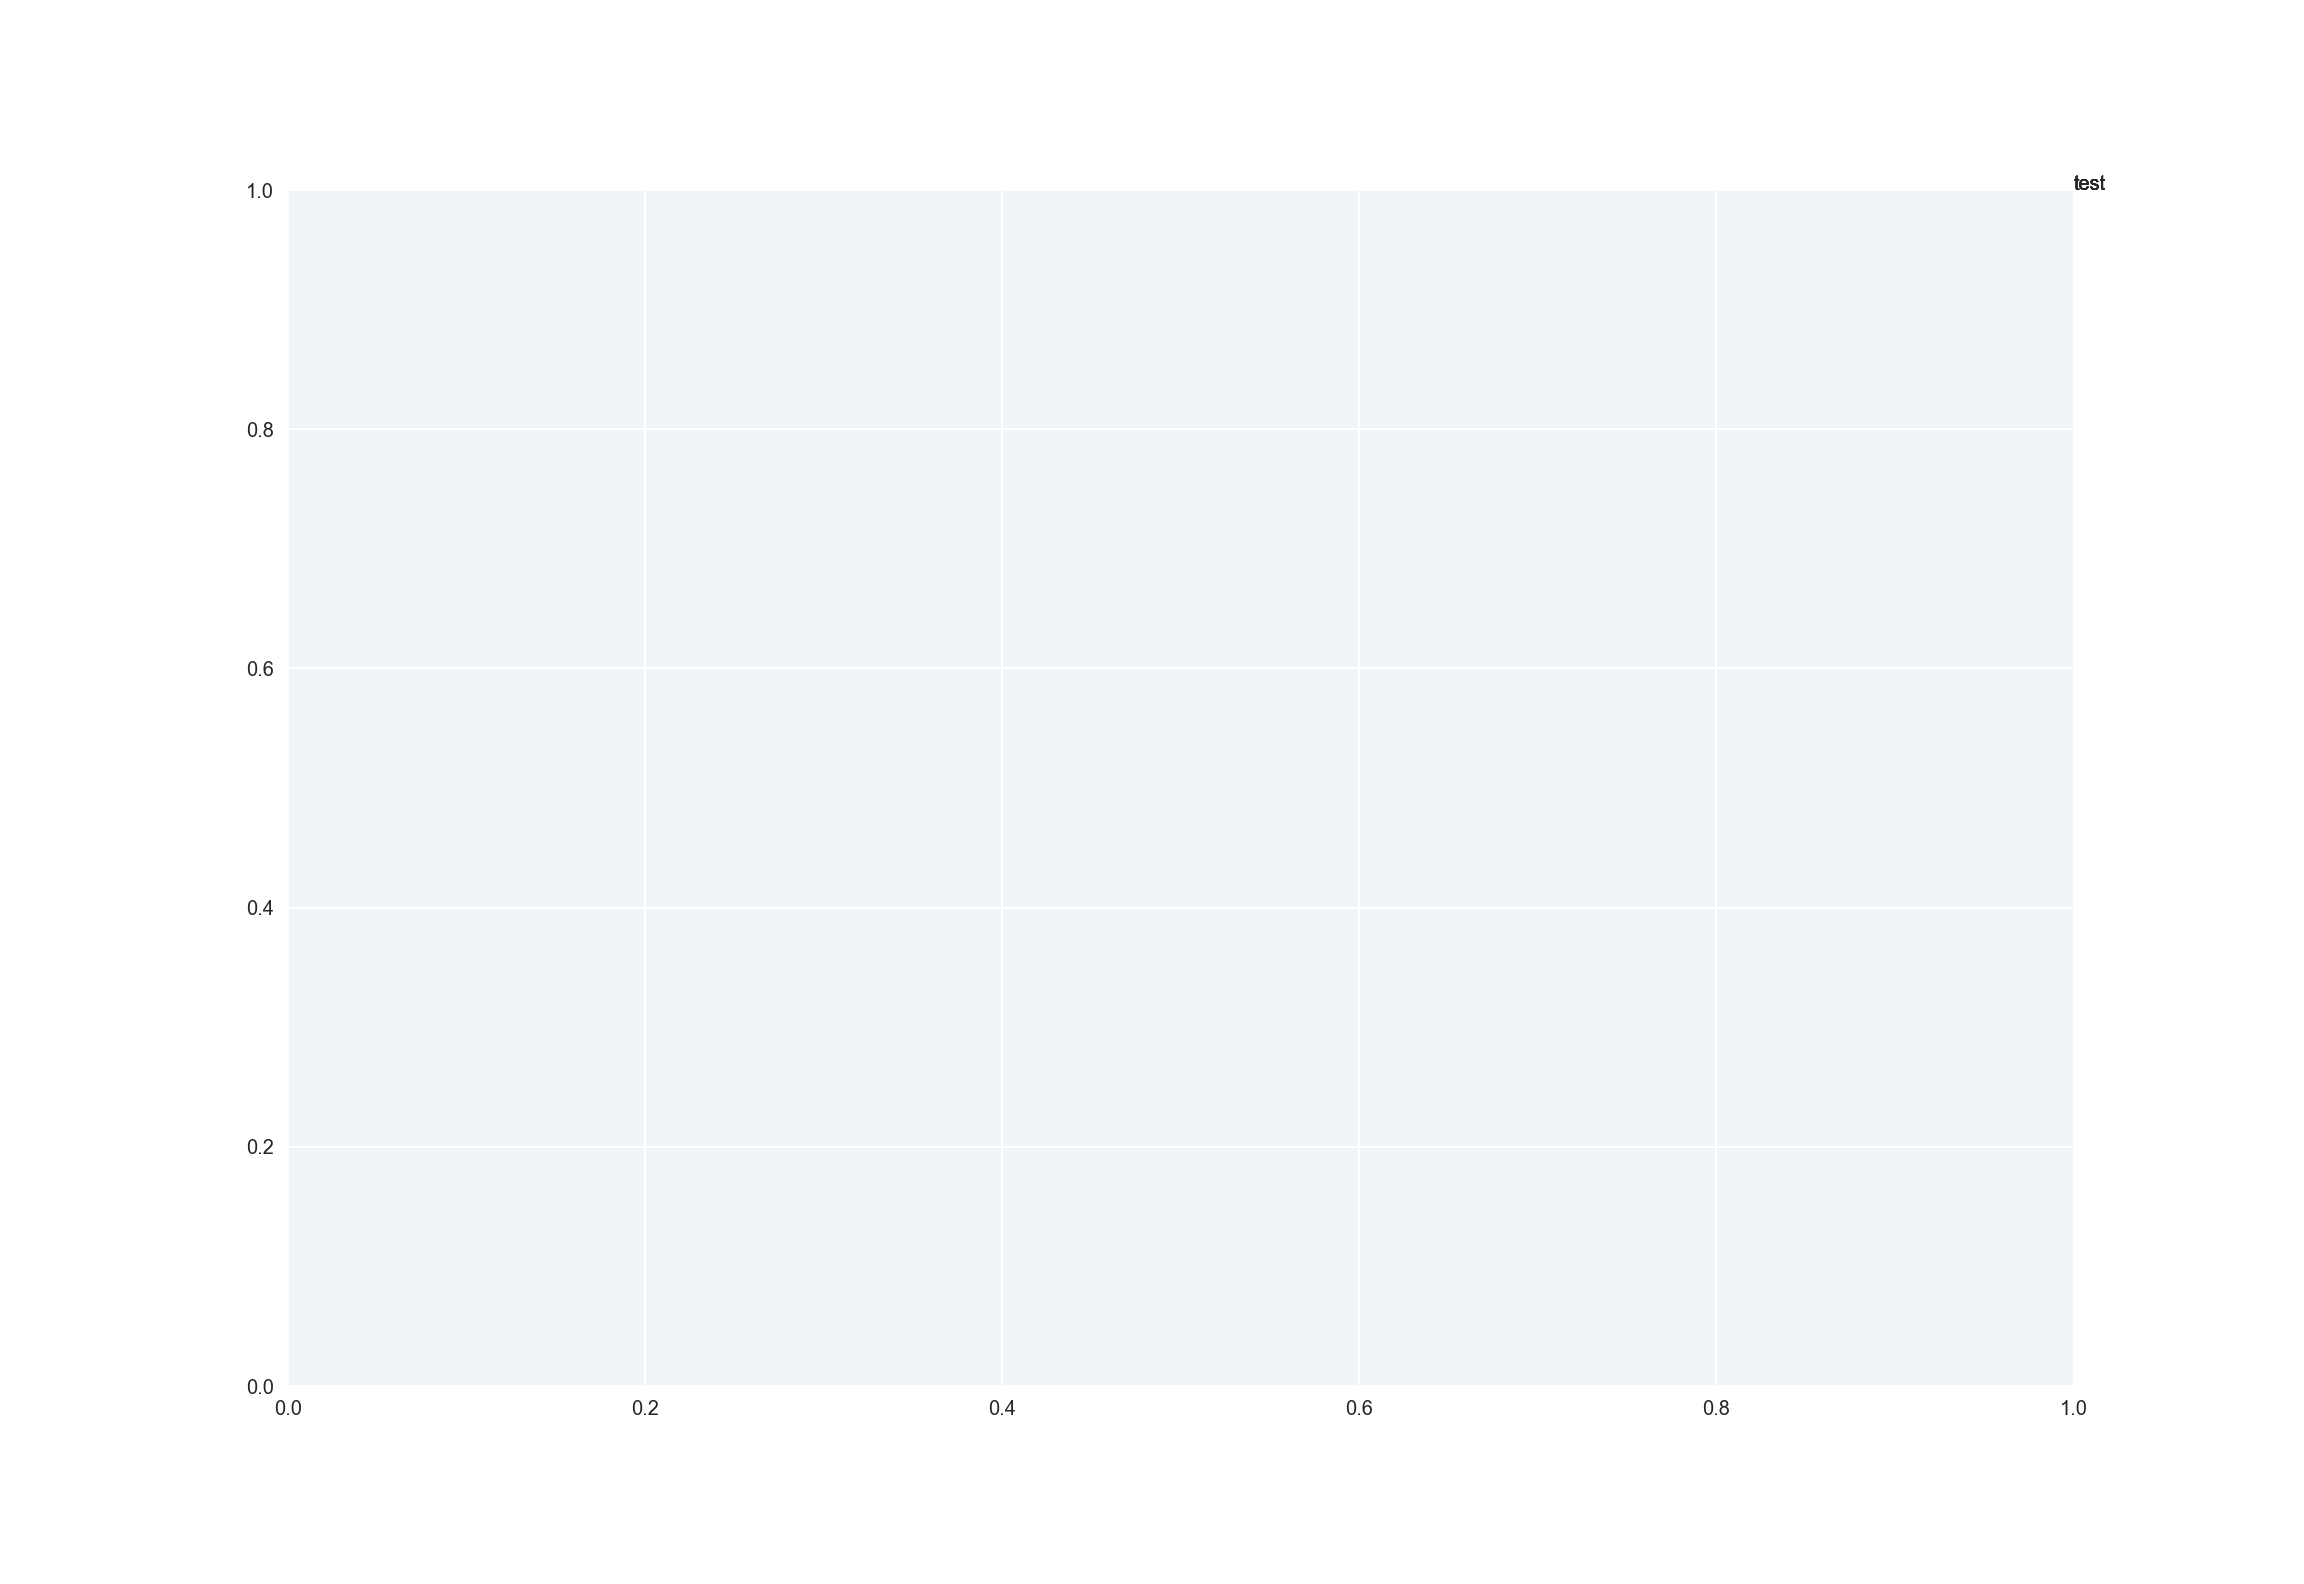

In [348]:
fig,ax = plt.subplots()

for trial_idx,trial in zip(new_trial.iterrows(),trials):
    ax.text(1, 1, "test")#f"{trial}") #trial_idx[0]-15

In [349]:
trial_idx

(964,
 oe_ms_relativ    24980.566667
 pb_ms_relativ    24980.450928
 oe_event                start
 pb_event                start
 delta_pb_oe         -0.115739
 Name: 964, dtype: object)

In [ ]:
fig,ax = plt_event_dif(combined_df,all=False)

<IPython.core.display.Javascript object>


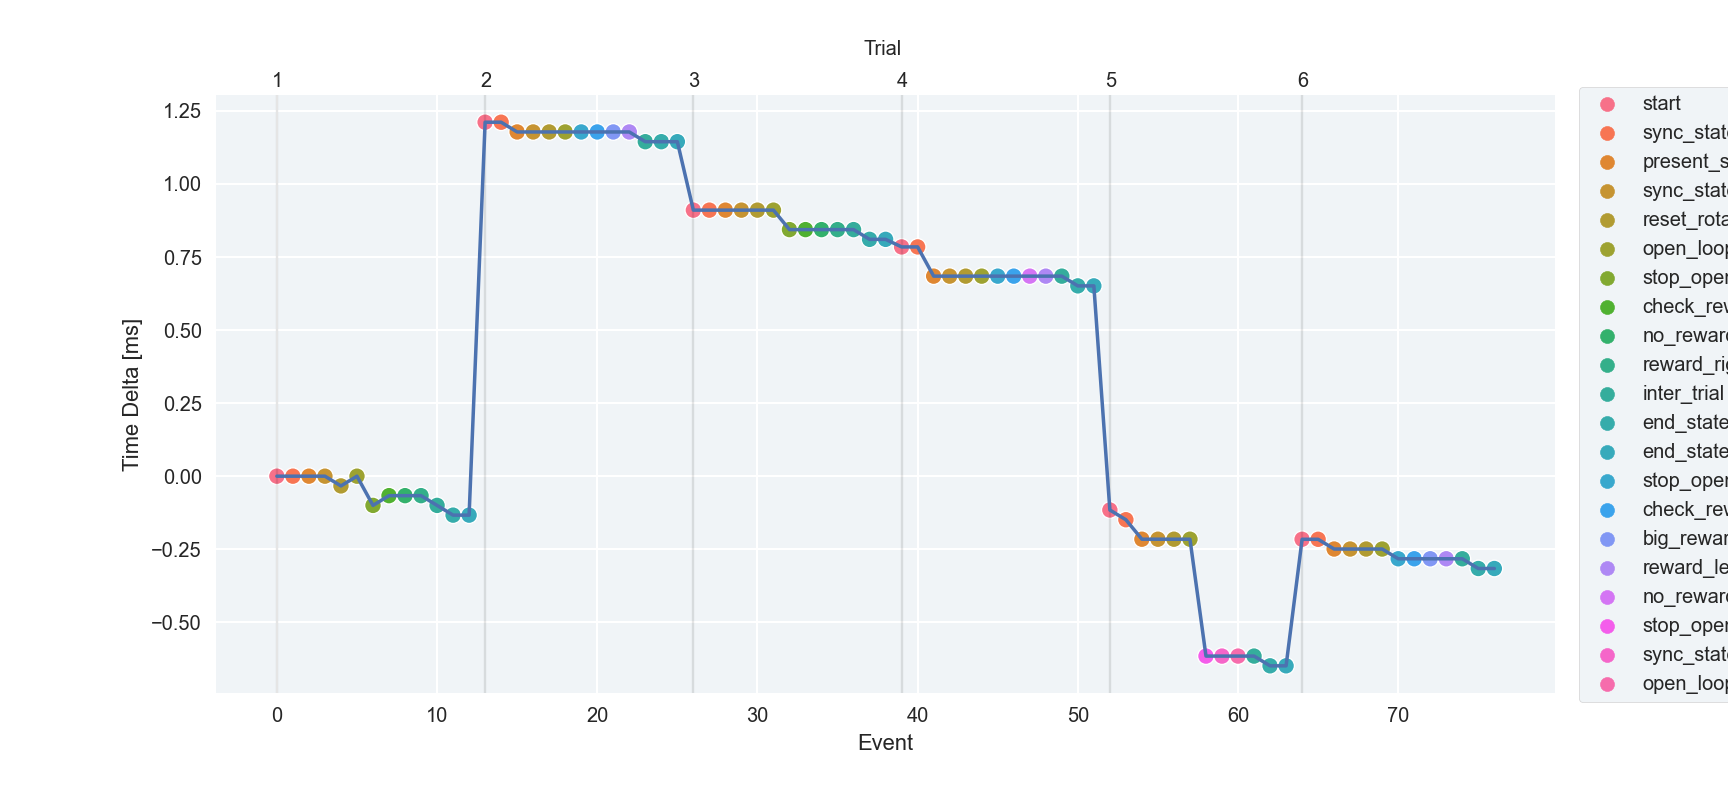

In [379]:
fig,ax = plt_event_dif(combined_df,all=False)